<a href="https://colab.research.google.com/github/rhonnyesoaress/Machine-Learning/blob/main/Prova_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Rhonnye Wendell Lourenço Soares Martins

---


Matrícula: **20220006232**

Importando Drive e Bibliotecas

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_auc_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/radiomic_data_binary.csv") # Leitura do DataFrame

In [ ]:
pd.set_option('display.max_columns', 10000) # Aumentado a capacidade de visualização de colunas e linhas
pd.set_option('display.max_rows', 10000)

In [ ]:
df.shape # Quantidade de linhas e colunas

(2018, 116)

In [ ]:
df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},245a9a4dd4a20aabe9c478e95a35aa833

Os seguintes valores que começam com diagnostics não contribuem muito para o apredizado, pois ou são valores redundates (como versoes do python e numpy) ou são valores unicos para cada amostra. Portanto, serão removidos.

In [ ]:
df['diagnostics_Versions_PyRadiomics'].value_counts()

,count
diagnostics_Versions_PyRadiomics,
v3.0.1,2018


In [ ]:
df['diagnostics_Versions_Numpy'].value_counts()

,count
diagnostics_Versions_Numpy,
1.25.2,2018


In [ ]:
df['diagnostics_Versions_SimpleITK'].value_counts()

,count
diagnostics_Versions_SimpleITK,
2.4.0,2018


In [ ]:
df['diagnostics_Versions_PyWavelet'].value_counts()

,count
diagnostics_Versions_PyWavelet,
1.7.0,2018


In [ ]:
df['diagnostics_Versions_Python'].value_counts()

,count
diagnostics_Versions_Python,
3.11.9,2018


In [ ]:
df['diagnostics_Configuration_Settings'].value_counts()

,count
diagnostics_Configuration_Settings,
"{'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}",2018


In [ ]:
df['diagnostics_Configuration_EnabledImageTypes'].value_counts()

,count
diagnostics_Configuration_EnabledImageTypes,
{'Original': {}},2018


In [ ]:
df['diagnostics_Image-original_Dimensionality'].value_counts()

,count
diagnostics_Image-original_Dimensionality,
2D,2018


In [ ]:
df['diagnostics_Image-original_Spacing'].value_counts()

,count
diagnostics_Image-original_Spacing,
"(1.0, 1.0)",2018


In [ ]:
df['diagnostics_Image-original_Size'].value_counts()

,count
diagnostics_Image-original_Size,
"(512, 512)",2018


In [ ]:
df['diagnostics_Image-original_Minimum'].value_counts()

,count
diagnostics_Image-original_Minimum,
0.0,2018


In [ ]:
drop_col = ['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
        'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes',
        'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
        'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum',
        'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size',
        'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass', 'original_firstorder_Maximum']

Removendo a seguir todas as colunas que, como mostrado anteriormente, não agrega ao aprendizado.

In [ ]:
df.drop(columns=drop_col, inplace=True)

In [ ]:
df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,44784.0,54244.0,1.631849e+14,8.461668,5156.0,2.729958,2971.766733,49594.801743,49642.0,37455.0,28080.0,2134.309690,49729.880304,-0.000881,1.631849e+14,0.003235,1.341664e+07,2.556723e+05,1.739795e+10,-3.949829e+04,80457.021295,5262.101599,0.877218,57.419258,7.113817,1942.627274,0.051102,0.018885,0.995891,0.952687,-0.190035,0.979466,0.013171,486.696536,0.000030,15.313136,0.880090,0.000124,973.393071,10.060570,21429.780724,8.836350,57108.022505,0.865470,0.074560,213.449739,21466.552607,2.579674e+05,1.229961,3.181131e+05,0.000038,0.000037,0.945408,2.436882e+05,0.000037,211.371380,0.003234,21482.733966,2.579332e+05,1.028522,2.653933e+05,0.000038,0.000037,8.533768,64154.207478,0.981441,0.990638,0.009529,0.992963,2.560921e+05,0.000037,205.226811,0.003230,21533.396092,2.578281e+05,1.119150,2.889922e+05,0.000039,0.000038,59047.223915,0.929263,0.972271,2.505764e+05,0.000038,8.692009,0.962976,0.040777,0.028123,0.000123,8

In [ ]:
df.describe()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,2018.000000,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000

In [ ]:
df.info(max_cols=116) # Tive que utilizar esse parametro que força a exibição.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 93 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_firstorder_10Percentile                    2018 non-null   float64
 1   original_firstorder_90Percentile                    2018 non-null   float64
 2   original_firstorder_Energy                          2018 non-null   float64
 3   original_firstorder_Entropy                         2018 non-null   float64
 4   original_firstorder_InterquartileRange              2018 non-null   float64
 5   original_firstorder_Kurtosis                        2018 non-null   float64
 6   original_firstorder_MeanAbsoluteDeviation           2018 non-null   float64
 7   original_firstorder_Mean                            2018 non-null   float64
 8   original_firstorder_Median                          2018 non-null   float64
 9

Verificando a existência de linhas duplicadas.

In [ ]:
dup = df.duplicated()
sum(dup)

0

Verificando a existência de valores nulos.

In [ ]:
df_null = df.isna().sum()
sum(df_null)

0

Verificando a quantidade de ocorrência em cada classe para analisar se há um desbalanceamento.

In [ ]:
df['class'].value_counts()

,count
class,
BENIGN,1100
MALIGNANT,918


Caso houvesse um desbalanceamento mais considerável, poderia ser feito técnicas de balanceamento como Undersampling e Oversampling.

Aplicando o LabelEncoder para transformar os rotulos das classes alvo para numeros. (0 para benigno e 1 para maligno)

In [ ]:
labelencoder_y = LabelEncoder()
df['class'] = labelencoder_y.fit_transform(df['class'])

Correlação dos Atributos

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

É possível notar nesse mapa de correlação que possuímos nessa base muitos atributos altamente correlacionados, portanto, iremos removê-los.

Analisando os atributos altamente correlacionados com correlação maior do que 0.85 e removendo um deles.

In [ ]:
# Pegar a parte superior da matriz
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Encontrar colunas com correlação maior que 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Remover colunas
df.drop(columns=to_drop, inplace=True)


In [ ]:
corr_reduced = df.corr()
corr_reduced.style.background_gradient(cmap='coolwarm')

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Range,original_firstorder_Skewness,original_firstorder_Uniformity,original_glcm_Autocorrelation,original_glcm_ClusterShade,original_glcm_Contrast,original_glcm_Correlation,original_glcm_Id,original_glcm_Idmn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_RunPercentage,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Contrast,original_ngtdm_Strength,class
original_firstorder_10Percentile,1.000000,0.602196,0.224164,-0.627961,-0.809654,0.011440,-0.929260,0.043435,-0.185611,-0.647262,0.382417,-0.438117,-0.356548,0.023076,-0.438217,0.523116,-0.277894,0.387772,-0.453941,-0.207356,-0.030313,-0.344480,0.263826,0.580523,0.338416,0.278150,0.089129,-0.467064,-0.576423,0.055012
original_firstorder_90Percentile,0.602196,1.000000,0.373800,-0.051997,-0.094031,-0.318976,-0.481681,-0.377288,-0.102813,0.000025,-0.088523,-0.339557,0.076345,0.119497,-0.182381,-0.050580,0.071059,0.279662,-0.107940,-0.076969,-0.115747,0.039165,-0.047248,0.062206,0.095714,-0.037521,0.175273,-0.164230,-0.098587,0.101384
original_firstorder_Energy,0.224164,0.373800,1.000000,0.178293,-0.040252,-0.075015,-0.108280,-0.275937,-0.135807,0.076704,-0.092109,-0.324970,0.244330,0.143255,0.243509,0.098248,0.038852,0.307341,0.321034,0.821707,-0.105216,-0.019997,0.665405,-0.184910,0.082329,0.091868,-0.416664,-0.211451,-0.218313,0.065259
original_firstorder_Entropy,-0.627961,-0.051997,0.178293,1.000000,0.706521,-0.230160,0.724248,-0.382485,-0.277056,0.684300,-0.408844,0.068168,0.669287,-0.190363,0.603949,-0.684482,0.576778,-0.154038,0.843962,0.408050,0.245642,0.234079,-0.350196,-0.928563,0.119878,-0.610782,0.049132,0.102549,0.444189,0.088325
original_firstorder_InterquartileRange,-0.809654,-0.094031,-0.040252,0.706521,1.000000,-0.275354,0.768356,-0.240923,0.216035,0.707434,-0.463043,0.311514,0.467644,0.059544,0.385872,-0.647464,0.371825,-0.301667,0.466944,0.190316,-0.040796,0.314946,-0.359507,-0.664725,-0.373744,-0.321121,0.012330,0.485492,0.563087,0.006865
original_firstorder_Kurtosis,0.011440,-0.318976,-0.075015,-0.230160,-0.275354,1.000000,0.039386,0.268407,0.018052,-0.013266,0.055097,0.009454,-0.273383,0.082554,0.040609,0.164900,-0.241220,0.138278,-0.195740,-0.026261,-0.061187,0.064621,0.242009,0.298058,0.001587,0.020716,-0.037542,-0.149690,0.101244,-0.051766
original_firstorder_Range,-0.929260,-0.481681,-0.108280,0.724248,0.768356,0.039386,1.000000,-0.253819,0.077455,0.830925,-0.454340,0.409087,0.399773,-0.107592,0.507410,-0.547426,0.321943,-0.380636,0.565280,0.284698,0.112509,0.401470,-0.250243,-0.643182,-0.209661,-0.384066,-0.103338,0.391543,0.609487,-0.044186
original_firstorder_Skewness,0.043435,-0.377288,-0.275937,-0.382485,-0.240923,0.268407,-0.253819,1.000000,0.125902,-0.530583,0.449475,0.092641,-0.273860,0.019560,-0.253766,0.320953,-0.275530,-0.054902,-0.275269,-0.152813,-0.035614,-0.086715,0.125012,0.304915,-0.082296,0.356041,-0.070191,-0.023062,-0.167806,-0.039073
original_firstorder_Uniformity,-0.185611,-0.102813,-0.135807,-0.277056,0.216035,0.018052,0.077455,0.125902,1.000000,-0.022220,0.212939,0.128835,-0.065945,0.573445,-0.058260,-0.081578,-0.076651,-0.054930,-0.421759,-0.129454,-0.442721,0.223142,-0.008965,0.128095,-0.880124,0.200467,-0.064301,0.239070,0.212004,-0.028699
original_glcm_Autocorrelation,-0.647262,0.000025,0.076704,0.684300,0.707434,-0.013266,0.830925,-0.530583,-0.022220,1.000000,-0.706102,0.216535,0.381742,-0.068950,0.422514,-0.556188,0.299415,-0.217569,0.496380,0.246201,0.068663,0.440868,-0.240493,-0.541471,-0.109438,-0.392312,-0.002540,0.27610


**Verificando o balanceamento das classes**

In [ ]:
df['class'].value_counts() # Está balanceada

,count
class,
0,1100
1,918


**Separando os rotulos, onde X vai receber todas as colunas menos a coluna 'class' e Y vai receber somente a coluna 'class'.**

In [ ]:
x = df.drop(columns = 'class')
y = df['class']

In [ ]:
print(x.shape)
print(y.shape)

(2018, 29)
(2018,)


Separando os conjutos de treinamento e teste ANTES de realizar o pré-processamento, para que não resulte em Data Leakage.

In [ ]:
from sklearn.model_selection import train_test_split  # Separação dos conjuntos de teste e treinamento

xtrain_set, xtest_set, ytrain_set, ytest_set = train_test_split(x, y, random_state=45, test_size=0.2, stratify=y)

In [ ]:
print(xtrain_set.shape)
print(ytrain_set.shape)
print(xtest_set.shape)
print(ytest_set.shape)

(1614, 29)
(1614,)
(404, 29)
(404,)


**Após a remoçao das colunas, ainda ficamos com 29 colunas. Portanto, usaremos PCA para fazer uma redução da dimensionalidade, transformando em Componentes Principais.**

Mas antes de realizar essa redução, o PCA precisa que os dados estejam normalizados.

Utilizei o MinMaxScaler pois é melhor para algoritmos baseados em distância, coisa que iremos utilizar. (KNN, Clusterização(KMeans, Hierárquico)

In [ ]:
# Vamos usar o StandardScaler para normalizar os valores de treinamento, pois possuem escalas muito diferentes.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrain_set[xtrain_set.columns] = scaler.fit_transform(xtrain_set[xtrain_set.columns])
xtest_set[xtest_set.columns] = scaler.fit_transform(xtest_set[xtest_set.columns])

Por ser uma área médica onde sempre há novas descobertas, optei por manter os outliers.

In [ ]:
xtrain_set.describe() # Valores normalizados

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Range,original_firstorder_Skewness,original_firstorder_Uniformity,original_glcm_Autocorrelation,original_glcm_ClusterShade,original_glcm_Contrast,original_glcm_Correlation,original_glcm_Id,original_glcm_Idmn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_RunPercentage,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Contrast,original_ngtdm_Strength
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,0.631131,0.762048,0.324690,0.595176,0.186814,0.046359,0.489078,0.469877,0.019673,0.144776,0.604905,0.106970,0.932004,0.166359,0.859831,0.467407,0.972054,0.238548,0.706363,0.383372,0.779566,0.022301,0.185418,0.169915,0.964520,0.074826,0.140670,0.038223,0.067673
std,0.181611,0.141882,0.185029,0.164549,0.127813,0.063366,0.220870,0.077278,0.048645,0.151590,0.043544,0.083384,0.081073,0.099219,0.119842,0.147047,0.055305,0.111164,0.130602,0.202625,0.140246,0.046768,0.126603,0.116250,0.069000,0.093310,0.110586,0.050861,0.099894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.561438,0.700836,0.180427,0.486262,0.104185,0.020659,0.332919,0.423420,0.008244,0.048256,0.608210,0.050579,0.921304,0.100430,0.813624,0.368390,0.972741,0.160111,0.636600,0.225572,0.694627,0.006505,0.099539,0.090562,0.962309,0.018498,0.072490,0.014389,0.016839
50%,0.667975,0.796900,0.299345,0.600121,0.156910,0.031726,0.441491,0.467276,0.012881,0.087924,0.614630,0.086361,0.959559,0.148604,0.896955,0.462182,0.989796,0.223228,0.718658,0.357195,0.817099,0.011747,0.159493,0.141953,0.978909,0.043165,0.108793,0.025294,0.033529
75%,0.752462,0.860386,0.438810,0.708347,0.230367,0.049695,0.595855,0.512698,0.019789,0.176898,0.616255,0.141209,0.979251,0.211704,0.942712,0.563666,0.996134,0.300693,0.796537,0.518705,0.888369,0.024542,0.243885,0.217555,0.987605,0.097006,0.171626,0.044759,0.072013
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Métricas F1_Score, Curva ROC e Matriz de Confusão do algoritmo da Árvore de Decisão sem a realizar o PCA.**


In [ ]:
from sklearn import tree # Treinamento utilizando a árvore de decisão sem PCA

clf = tree.DecisionTreeClassifier(random_state=45, class_weight='balanced')
clf.fit(xtrain_set, ytrain_set)
predict = clf.predict(xtest_set)

In [ ]:
#Validacao Cruzada
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=45)
cross_val_score(clf, x, y, cv=10)


array([0.53960396, 0.50990099, 0.51980198, 0.51980198, 0.53465347,
       0.53960396, 0.55445545, 0.54950495, 0.6119403 , 0.48258706])

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

tree_accuracy_f1= f1_score(ytest_set, predict)
tree_accuracy_roc = roc_auc_score(ytest_set, predict, average='samples')
print(f"Acurácia F1-Score: {tree_accuracy_f1}") # Acurácia da Arvore de Decisão utilizando a métrica f1-score antes do PCA.
print(f"Acurácia Curva ROC: {tree_accuracy_roc}") # Acurácia da Arvore de Decisão utilizando a métrica curva roc antes do PCA.

Acurácia F1-Score: 0.5433255269320844
Acurácia Curva ROC: 0.5265810276679842


In [ ]:
from sklearn.metrics import classification_report

accuracy_classific = classification_report(ytest_set, predict)
print(accuracy_classific)

              precision    recall  f1-score   support

           0       0.58      0.42      0.49       220
           1       0.48      0.63      0.54       184

    accuracy                           0.52       404
   macro avg       0.53      0.53      0.52       404
weighted avg       0.53      0.52      0.51       404



<Figure size 1000x700 with 0 Axes>

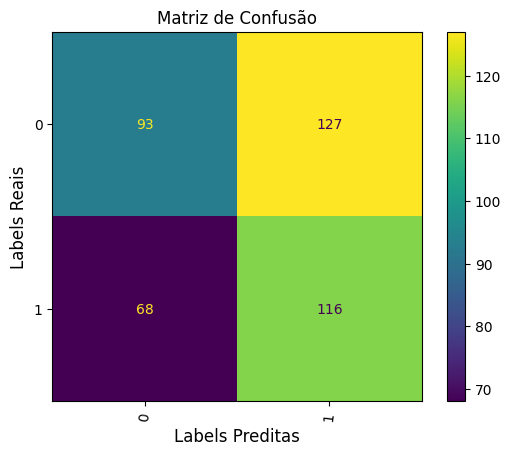

In [ ]:
cm = confusion_matrix(ytest_set, predict)

plt.figure(figsize=(10, 7))

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

plt.title('Matriz de Confusão')
plt.xlabel('Labels Preditas', fontsize=12)
plt.ylabel('Labels Reais', fontsize=12)
plt.xticks(rotation=84)
plt.show()


**Métricas F1_Score, Curva ROC e Matriz de Confusão do algoritmo MPL sem realizar o PCA.**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512, 256), activation="relu", max_iter=200,random_state=45)
mlp.fit(xtrain_set, ytrain_set)
predictions = mlp.predict(xtest_set)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_accuracy_f1 = f1_score(ytest_set, predictions)
mlp_accuracy_roc = roc_auc_score(ytest_set, predictions, average='samples')
print(f"Acurácia F1-Score: {mlp_accuracy_f1}")
print(f"Acurácia Curva ROC: {mlp_accuracy_roc}")

Acurácia F1-Score: 0.6342412451361867
Acurácia Curva ROC: 0.5633893280632412


<Figure size 1000x700 with 0 Axes>

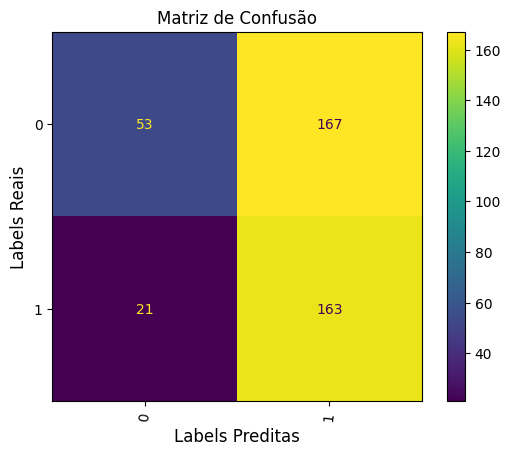

In [ ]:
cm = confusion_matrix(ytest_set, predictions)

plt.figure(figsize=(10, 7))

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

plt.title('Matriz de Confusão')
plt.xlabel('Labels Preditas', fontsize=12)
plt.ylabel('Labels Reais', fontsize=12)
plt.xticks(rotation=84)
plt.show()


Realizando o PCA dividindo em 20 componentes principais.

In [ ]:
from sklearn.model_selection import train_test_split  # Separação dos conjuntos de teste e treinamento

xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(x, y, random_state=45, test_size=0.2)

In [ ]:
# Vamos escalonar usando MinMaxScaler, para normalizar os valores de treinamento, pois possuem escalas muito diferentes.
from sklearn.preprocessing import MinMaxScaler

scaler_pca = MinMaxScaler()
xtrain_pca[xtrain_pca.columns] = scaler_pca.fit_transform(xtrain_pca[xtrain_pca.columns])
xtest_pca[xtest_pca.columns] = scaler_pca.fit_transform(xtest_pca[xtest_pca.columns])

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 20)
xtrain_pca = pca.fit_transform(xtrain_pca)
xtest_pca = pca.transform(xtest_pca)

In [ ]:
print(f"Linhas e Colunas: {xtrain_pca.shape}")
print(f"Linhas e Colunas: {xtest_pca.shape}")

Linhas e Colunas: (1614, 20)
Linhas e Colunas: (404, 20)


**Métricas F1-Score, Curva ROC e Matriz de Confusão do Algoritmo de Árvore de Decisão com o PCA dividido em 20 componentes principais.**

In [ ]:
from sklearn import tree # Treinamento utilizando a árvore de decisão com PCA

clf_pca = tree.DecisionTreeClassifier(random_state=45)
clf_pca.fit(xtrain_pca, ytrain_pca)
predict_pca = clf_pca.predict(xtest_pca)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

pca_tree_accuracy_f1 = f1_score(ytest_pca, predict_pca, average='weighted')
pca_tree_accuracy_roc = roc_auc_score(ytest_pca, predict_pca)
print(f"Acurácia F1-Score: {pca_tree_accuracy_f1}") # Acurácia da Arvore de Decisão utilizando a métrica f1-score após o PCA.
print(f"Acurácia Curva ROC: {pca_tree_accuracy_roc}") # Acurácia da Arvore de Decisão utilizando a métrica curva roc após o PCA.

Acurácia F1-Score: 0.5491435041933572
Acurácia Curva ROC: 0.5395733652312599


<Figure size 1000x700 with 0 Axes>

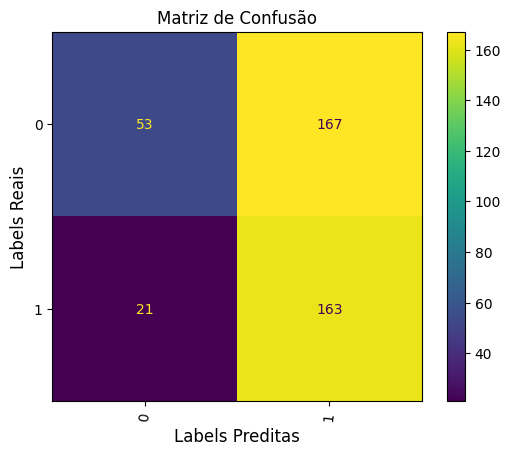

In [ ]:
mlp_pca_cm = confusion_matrix(ytest_pca, predict_pca)

plt.figure(figsize=(10, 7))

cmd_pca = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd_pca.plot()

plt.title('Matriz de Confusão')
plt.xlabel('Labels Preditas', fontsize=12)
plt.ylabel('Labels Reais', fontsize=12)
plt.xticks(rotation=84)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

accuracy_classific_pca = classification_report(ytest_pca, predict_pca)
print(accuracy_classific_pca)

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       228
           1       0.48      0.44      0.46       176

    accuracy                           0.55       404
   macro avg       0.54      0.54      0.54       404
weighted avg       0.55      0.55      0.55       404



**Métricas do MLP F1_Score, Curva ROC e Matriz de Confusão após realizar o PCA.**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512, 256), activation="relu", max_iter=200,random_state=45)
mlp.fit(xtrain_pca, ytrain_pca)
predictions = mlp.predict(xtest_pca)

In [ ]:
pca_mlp_accuracy_f1 = f1_score(ytest_pca, predictions)
pca_mlp_accuracy_roc = roc_auc_score(ytest_pca, predictions)
print(f"Acurácia F1-Score: {pca_mlp_accuracy_f1}")
print(f"Acurácia Curva ROC: {pca_mlp_accuracy_roc}")

Acurácia F1-Score: 0.5701559020044543
Acurácia Curva ROC: 0.5456539074960127


<Figure size 1000x700 with 0 Axes>

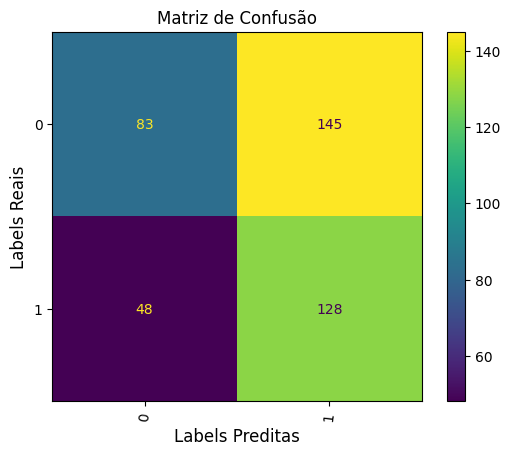

In [ ]:
cm = confusion_matrix(ytest_pca, predictions)

plt.figure(figsize=(10, 7))

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

plt.title('Matriz de Confusão')
plt.xlabel('Labels Preditas', fontsize=12)
plt.ylabel('Labels Reais', fontsize=12)
plt.xticks(rotation=84)
plt.show()


O modelo não obteve melhoras consideráveis ao realizar o PCA, tanto que os resultados do algoritmo da Árvore de Decisão se mantiveram iguais e o melhor resultado do algoritmo MLP que obtive foi antes de realizar o PCA.

**Clusterização**

In [ ]:
df_clust = df.drop(columns=['class'])

In [ ]:
# Vamos escalonar usando MinMaxScaler, para normalizar os valores da base para clusterizar, pois possuem escalas muito diferentes.
from sklearn.preprocessing import MinMaxScaler

minmax_scaler_clust = MinMaxScaler()
df_clust[df_clust.columns] = minmax_scaler_clust.fit_transform(df_clust[df_clust.columns])

In [ ]:
df_clust.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Range,original_firstorder_Skewness,original_firstorder_Uniformity,original_glcm_Autocorrelation,original_glcm_ClusterShade,original_glcm_Contrast,original_glcm_Correlation,original_glcm_Id,original_glcm_Idmn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_RunPercentage,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.723116,0.736259,0.205997,0.365305,0.096162,0.036264,0.370906,0.478609,0.022883,0.052328,0.615018,0.392806,0.594017,0.014471,0.335213,0.805777,0.791795,0.066462,0.665033,0.256255,0.963449,0.006122,0.226135,0.325042,0.996263,0.264790,0.029457,0.069263,0.005872
1,0.270151,0.639532,0.109503,0.746736,0.428865,0.017024,0.897998,0.443984,0.004891,0.347455,0.583851,0.529238,0.950833,0.001440,0.806742,0.394077,0.996179,0.044391,0.821990,0.257313,0.970597,0.040869,0.067027,0.069467,0.996999,0.021694,0.076998,0.187045,0.087780
2,0.793893,0.958492,0.340389,0.565004,0.129201,0.060848,0.337297,0.344391,0.014277,0.133602,0.604054,0.012852,0.991005,0.319711,0.967778,0.285406,0.997135,0.558033,0.556595,0.220028,0.497115,0.024263,0.169534,0.199061,0.932473,0.008769,0.253219,0.007139,0.112042
3,0.744478,0.868655,0.241367,0.641722,0.169566,0.030366,0.391414,0.427629,0.008483,0.109207,0.610957,0.051127,0.972962,0.167918,0.916828,0.379780,0.995226,0.308773,0.700115,0.228345,0.774866,0.014795,0.097896,0.120478,0.974185,0.015621,0.210790,0.013276,0.061709
4,0.690241,0.812268,0.436497,0.608887,0.117904,0.042022,0.411435,0.416042,0.011247,0.101905,0.610210,0.042735,0.976201,0.185538,0.936080,0.431813,0.991822,0.331936,0.700450,0.437682,0.729116,0.014452,0.246111,0.159848,0.968336,0.034364,0.096806,0.012173,0.034001


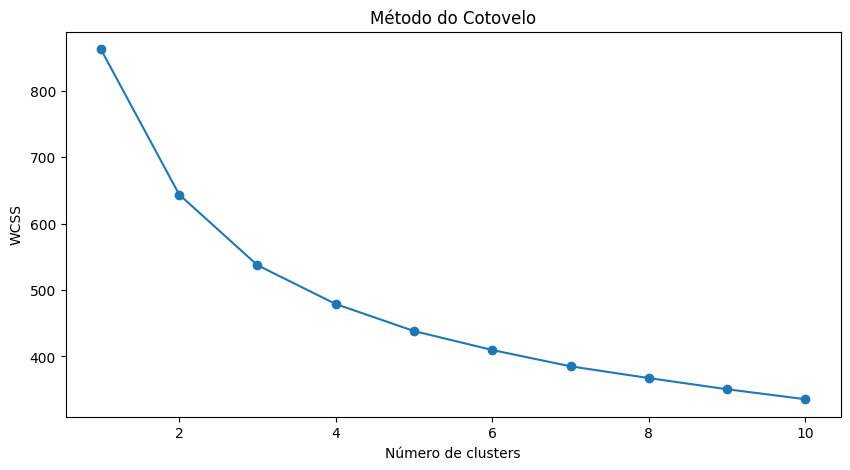

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=45)
    kmeans.fit(df_clust)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

O método do cotovelo indica que o número ideal de clusters é 2, pois a partir desse ponto a redução da inércia é menos significativa.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=45, n_init='auto')
kmeans.fit(df_clust)


KMeans(n_clusters=2, random_state=45)

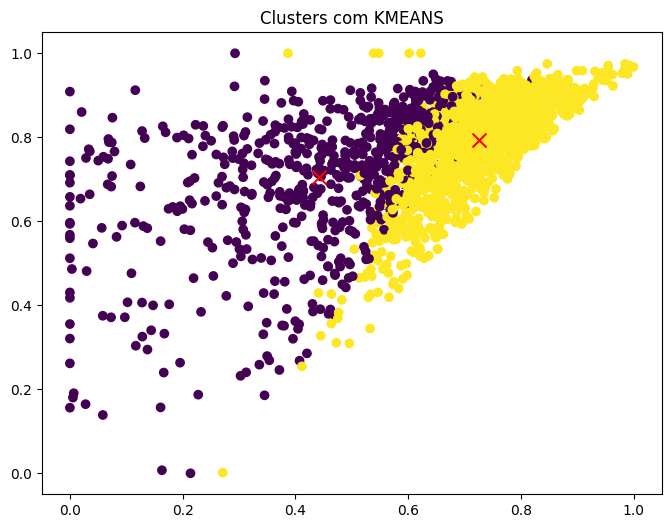

In [ ]:
labels = kmeans.predict(df_clust)

plt.figure(figsize=(8, 6))
plt.scatter(df_clust.iloc[:, 0], df_clust.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title('Clusters com KMEANS')
plt.show()

**Clusterização Hierárquica utilizando a métrica Silhouette Scores**

Método linkage = 'ward'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

clustering_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering_ward.fit(df_clust)

silhouette_scores['ward'] = silhouette_score(df_clust, clustering.labels_)

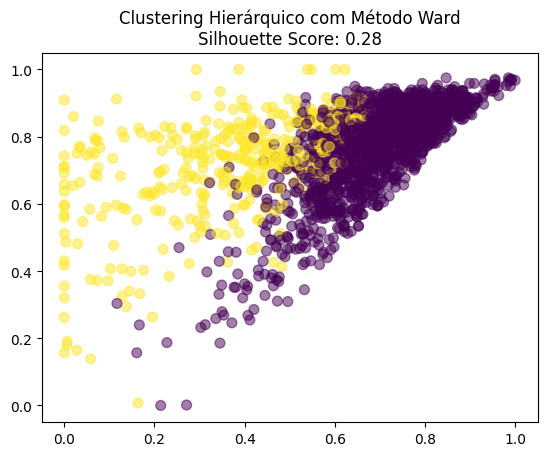

In [ ]:
import matplotlib.pyplot as plt


plt.figure()
plt.scatter(df_clust.iloc[:, 0], df_clust.iloc[:, 1], c=clustering.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title(f'Clustering Hierárquico com Método Ward\nSilhouette Score: {score:.2f}')
plt.show()

Plot de um dendograma do método linkage ward

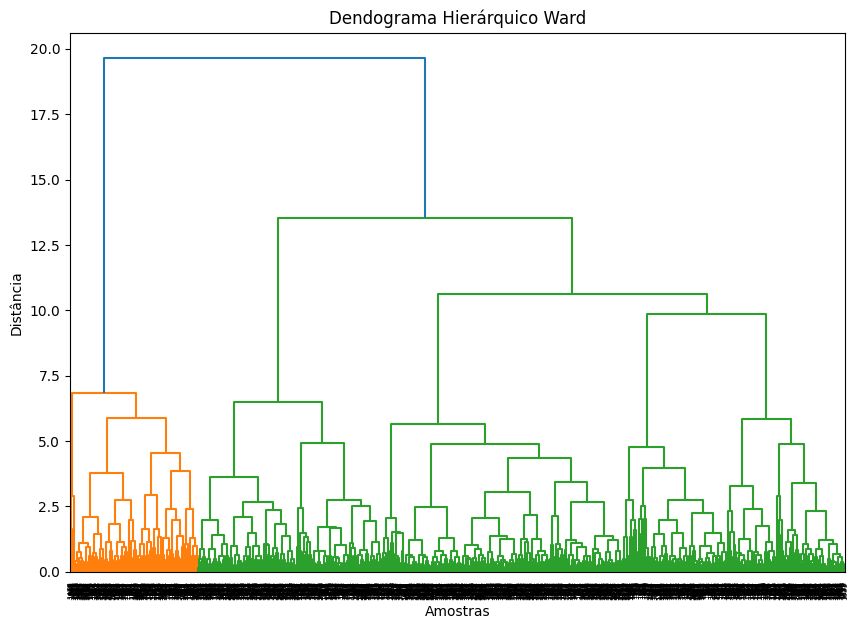

In [ ]:
Z = sch.linkage(df_clust, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendograma Hierárquico Ward')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Método linkage = 'average'

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

clustering_average = AgglomerativeClustering(n_clusters=2, linkage='average')
clustering_average.fit(df_clust)

silhouette_scores['average'] = silhouette_score(df_clust, clustering.labels_)

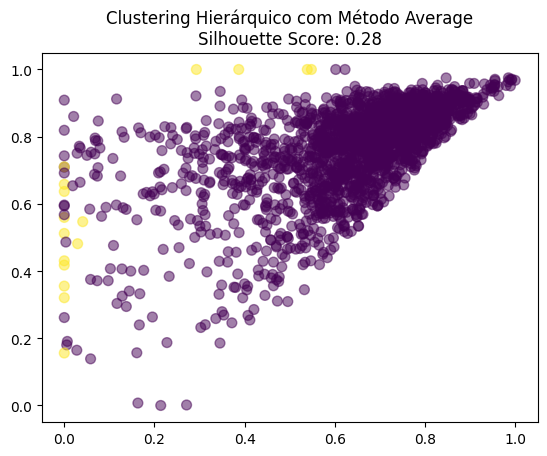

In [ ]:
plt.figure()
plt.scatter(df_clust.iloc[:, 0], df_clust.iloc[:, 1], c=clustering_average.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title(f'Clustering Hierárquico com Método Average\nSilhouette Score: {score:.2f}')
plt.show()

Ambos os métodos de linkage (ward e average) obtiveram resultados semelhantes, assim como foi com as métricas f1-score e curva ROC.